In [19]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk


In [20]:
PATH = './data/iris_dataset.csv'

dataset = pd.read_csv(PATH, na_values='NA')
dataset.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
dataset.isnull().any()

sepal_length_cm    False
sepal_width_cm     False
petal_length_cm    False
petal_width_cm      True
class              False
dtype: bool

In [22]:
dataset.describe(include='all')

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
count,150.000000,150.000000,150.000000,145.000000,150
unique,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.644627,3.054667,3.758667,1.236552,NaN
std,1.312781,0.433123,1.764420,0.755058,NaN
min,0.055000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.400000,NaN
50%,5.700000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [23]:
dataset['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [24]:
dataset['class'] = dataset['class'].map(lambda x: 'Iris-setosa' if x == 'Iris-setossa' else 'Iris-versicolor' if x == 'versicolor' else x)
dataset['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

/home/lorenzo/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/lorenzo/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/lorenzo/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

<AxesSubplot:xlabel='petal_width_cm', ylabel='Density'>

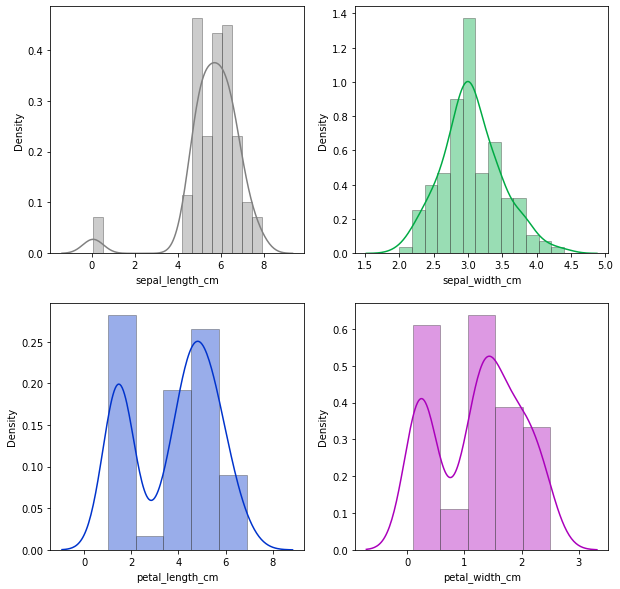

In [46]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
sns.distplot(dataset.sepal_length_cm, ax=axs[0, 0], color='#808080', hist_kws=dict(
    edgecolor='#404040', linewidth=1))
sns.distplot(dataset.sepal_width_cm, ax=axs[0, 1], color='#00AA44', hist_kws=dict(
    edgecolor='#404040', linewidth=1))
sns.distplot(dataset.petal_length_cm, ax=axs[1, 0], color='#0033cc', hist_kws=dict(
    edgecolor='#404040', linewidth=1))
sns.distplot(dataset.loc[dataset.petal_width_cm.notnull(), 'petal_width_cm'], ax=axs[1, 1],
             color='#aa00bb', hist_kws=dict(edgecolor='#404040', linewidth=1))


/home/lorenzo/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/lorenzo/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/lorenzo/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/lorenzo

<AxesSubplot:xlabel='petal_width_cm'>

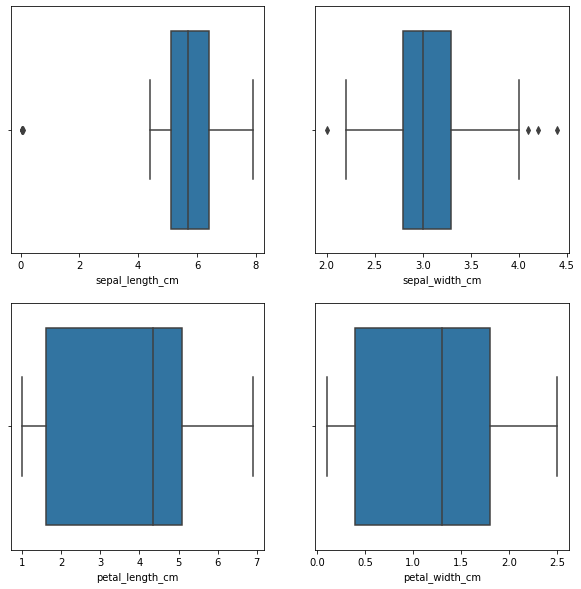

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.boxplot(dataset.sepal_length_cm, ax=axs[0, 0])
sns.boxplot(dataset.sepal_width_cm, ax=axs[0, 1])
sns.boxplot(dataset.petal_length_cm, ax=axs[1, 0])
sns.boxplot(dataset.loc[dataset.petal_width_cm.notnull(), 'petal_width_cm'], ax=axs[1, 1])

In [27]:
dataset.petal_width_cm.fillna(dataset.petal_width_cm.median(), inplace=True)
dataset.describe(include='all')

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.644627,3.054667,3.758667,1.238667,NaN
std,1.312781,0.433123,1.764420,0.742369,NaN
min,0.055000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.400000,NaN
50%,5.700000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [28]:
dataset['class'] = dataset['class'].map(lambda x: 1 if x == "Iris-versicolor" else -1)


In [29]:
dataset.describe(include="all")

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.644627,3.054667,3.758667,1.238667,-0.333333
std,1.312781,0.433123,1.764420,0.742369,0.945968
min,0.055000,2.000000,1.000000,0.100000,-1.000000
25%,5.100000,2.800000,1.600000,0.400000,-1.000000
50%,5.700000,3.000000,4.350000,1.300000,-1.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000


In [30]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_validate, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score


In [31]:
def accuracy_report(y_true, y_pred):
    print(f"Accuracy of the model: {accuracy_score(y_true, y_pred):.3f}")
    print(f"ROC AUC: {roc_auc_score(y_true, y_pred):.3f}")

In [32]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [34]:
model = LogisticRegression(solver='liblinear')
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_score = cross_validate(model, X, y, cv=cv, return_train_score=True, scoring=('roc_auc', 'accuracy'))
pd.DataFrame(cv_score)

,fit_time,score_time,test_roc_auc,train_roc_auc,test_accuracy,train_accuracy
0,0.002109,0.003952,0.74,0.829136,0.666667,0.696296
1,0.001539,0.002363,0.94,0.816049,0.733333,0.674074
2,0.001403,0.002483,0.84,0.837531,0.600000,0.688889
3,0.001663,0.002459,0.76,0.834321,0.600000,0.688889
4,0.001390,0.002574,0.94,0.819506,0.733333,0.674074
5,0.001401,0.002986,0.74,0.820000,0.666667,0.688889
6,0.001489,0.002623,0.66,0.838765,0.533333,0.711111
7,0.001441,0.002714,0.92,0.806914,0.800000,0.674074
8,0.001526,0.002913,0.98,0.798765,0.733333,0.666667
9,0.001780,0.002920,0.76,0.823210,0.666667,0.681481


In [35]:
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))
accuracy_report(y_train, model.predict(X_train))
accuracy_report(y_test, model.predict(X_test))

              precision    recall  f1-score   support

          -1       0.70      0.95      0.81        20
           1       0.67      0.20      0.31        10

    accuracy                           0.70        30
   macro avg       0.69      0.57      0.56        30
weighted avg       0.69      0.70      0.64        30

Accuracy of the model: 0.675
ROC AUC: 0.556
Accuracy of the model: 0.700
ROC AUC: 0.575


In [36]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}